In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
df = pd.read_csv("/content/Sales_coffee.csv")
df.head()

,Area Code,Cogs,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,Product Line,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,2012-10-01 00:00:00.000,503,71,Major Market,Central,46,1,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,2012-10-01 00:00:00.000,405,71,Major Market,Central,17,1,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,2012-10-01 00:00:00.000,419,64,Major Market,South,13,1,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,2012-10-01 00:00:00.000,871,56,Major Market,East,10,1,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,2012-10-01 00:00:00.000,650,110,Major Market,West,23,1,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular


In [8]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       1062 non-null   int64 
 1   Cogs            1062 non-null   int64 
 2   Date            1062 non-null   object
 3   Inventory       1062 non-null   int64 
 4   Margin          1062 non-null   int64 
 5   Market Size     1062 non-null   object
 6   Market          1062 non-null   object
 7   Marketing       1062 non-null   int64 
 8   记录数             1062 non-null   int64 
 9   Product Line    1062 non-null   object
 10  Product Type    1062 non-null   object
 11  Product         1062 non-null   object
 12  Profit          1062 non-null   int64 
 13  Sales           1062 non-null   int64 
 14  State           1062 non-null   object
 15  Target COGS     1062 non-null   int64 
 16  Target Margin   1062 non-null   int64 
 17  Target Profit   1062 non-null   int64 
 18  Target S

,Area Code,Cogs,Inventory,Margin,Marketing,记录数,Profit,Sales,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.0,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,815.175141,102.423729,30.433145,1.0,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,916.156386,91.286704,25.963448,0.0,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-3534.000000,-294.000000,0.000000,1.0,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,447.000000,51.000000,13.000000,1.0,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,659.000000,73.000000,22.000000,1.0,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,968.000000,130.000000,40.750000,1.0,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,8252.000000,526.000000,122.000000,1.0,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


In [9]:
# Identify datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns

# Fill missing values with mean for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convert datetime columns to appropriate format
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])

# Drop rows with missing values in datetime columns
df = df.dropna(subset=datetime_cols)


In [ ]:
df = df.drop_duplicates()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Inventory']] = scaler.fit_transform(df[['Inventory']])
df.head()

,Area Code,Cogs,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,Product Line,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,2012-10-01 00:00:00.000,0.342525,71,Major Market,Central,46,1,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,2012-10-01 00:00:00.000,0.334210,71,Major Market,Central,17,1,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,2012-10-01 00:00:00.000,0.335398,64,Major Market,South,13,1,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,2012-10-01 00:00:00.000,0.373749,56,Major Market,East,10,1,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,2012-10-01 00:00:00.000,0.354997,110,Major Market,West,23,1,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular


In [12]:
df = df.drop("记录数", axis=1)
df = df.drop("Cogs", axis=1)
df = df.drop("Target COGS", axis=1)
df = df.drop("Margin", axis=1)
df = df.drop("Marketing", axis=1)
df = df.drop("Target Margin", axis=1)
df = df.drop("Target Sales", axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       1062 non-null   int64  
 1   Date            1062 non-null   object 
 2   Inventory       1062 non-null   float64
 3   Market Size     1062 non-null   object 
 4   Market          1062 non-null   object 
 5   Product Line    1062 non-null   object 
 6   Product Type    1062 non-null   object 
 7   Product         1062 non-null   object 
 8   Profit          1062 non-null   int64  
 9   Sales           1062 non-null   int64  
 10  State           1062 non-null   object 
 11  Target Profit   1062 non-null   int64  
 12  Total Expenses  1062 non-null   int64  
 13  Type            1062 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 116.3+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Area Code,Date,Inventory,Market Size,Market,Product Line,Product Type,Product,Profit,Sales,State,Target Profit,Total Expenses,Type
0,303,2012-10-01,0.342525,Major Market,Central,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,76,Decaf
1,970,2012-10-01,0.334210,Major Market,Central,Leaves,Herbal Tea,Mint,26,123,Colorado,50,45,Decaf
2,409,2012-10-01,0.335398,Major Market,South,Leaves,Herbal Tea,Lemon,28,107,Texas,50,36,Decaf
3,850,2012-10-01,0.373749,Major Market,East,Leaves,Tea,Darjeeling,35,94,Florida,50,21,Regular
4,562,2012-10-01,0.354997,Major Market,West,Leaves,Tea,Green Tea,56,182,California,50,54,Regular


In [14]:
df['Difference_profit'] = df['Profit'] - df['Target Profit']
df.head()

,Area Code,Date,Inventory,Market Size,Market,Product Line,Product Type,Product,Profit,Sales,State,Target Profit,Total Expenses,Type,Difference_profit
0,303,2012-10-01,0.342525,Major Market,Central,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,76,Decaf,-35
1,970,2012-10-01,0.334210,Major Market,Central,Leaves,Herbal Tea,Mint,26,123,Colorado,50,45,Decaf,-24
2,409,2012-10-01,0.335398,Major Market,South,Leaves,Herbal Tea,Lemon,28,107,Texas,50,36,Decaf,-22
3,850,2012-10-01,0.373749,Major Market,East,Leaves,Tea,Darjeeling,35,94,Florida,50,21,Regular,-15
4,562,2012-10-01,0.354997,Major Market,West,Leaves,Tea,Green Tea,56,182,California,50,54,Regular,6


**DATA ANALAYSIS**

Text(0, 0.5, 'Profit')

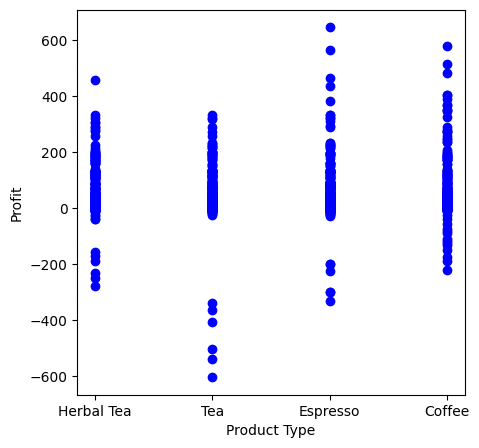

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(df['Product Type'], df['Profit'], color='blue')
plt.xlabel('Product Type')
plt.ylabel('Profit')


ThIs demonstrates that our Actual Profit is more then target profit hence the sales for Tea was more

Text(0, 0.5, 'Sales')

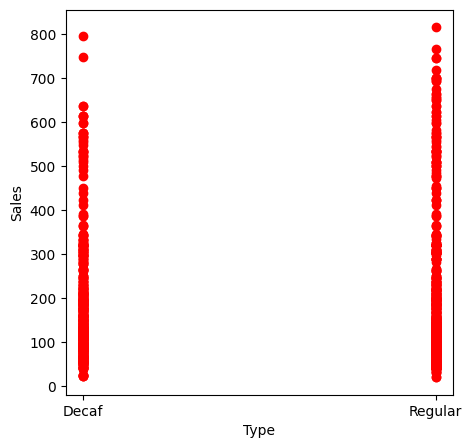

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(df['Type'], df['Sales'], color='red')
plt.xlabel('Type')
plt.ylabel('Sales')

Text(0, 0.5, 'Inventory')

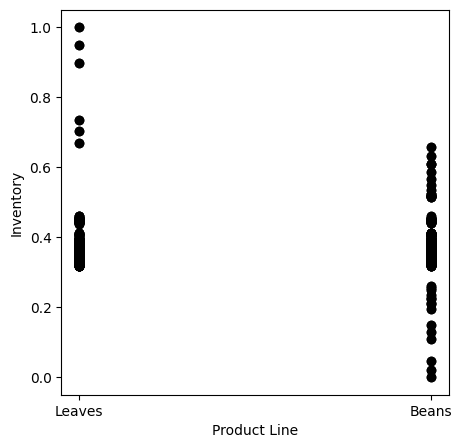

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(df['Product Line'], df['Inventory'], color='black')
plt.xlabel('Product Line')
plt.ylabel('Inventory')

Text(0, 0.5, 'Sales')

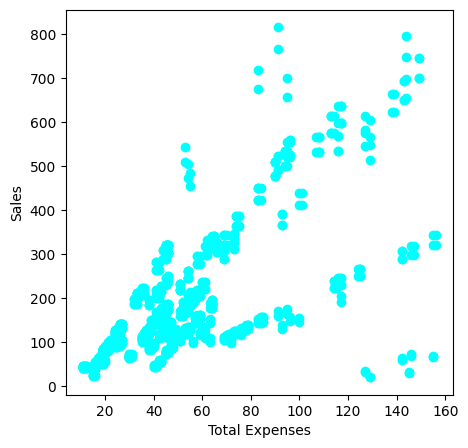

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(df['Total Expenses'], df['Sales'], color='cyan')
plt.xlabel('Total Expenses')
plt.ylabel('Sales')

Correlation Matrix:
                   Area Code  Inventory    Profit     Sales  Target Profit  \
Area Code           1.000000   0.078211  0.027214  0.076943       0.031386   
Inventory           0.078211   1.000000 -0.262161  0.206739      -0.184251   
Profit              0.027214  -0.262161  1.000000  0.799925       0.907299   
Sales               0.076943   0.206739  0.799925  1.000000       0.785957   
Target Profit       0.031386  -0.184251  0.907299  0.785957       1.000000   
Total Expenses      0.044236   0.428690  0.193657  0.682362       0.227536   
Difference_profit   0.006606  -0.270966  0.674608  0.433979       0.301678   

                   Total Expenses  Difference_profit  
Area Code                0.044236           0.006606  
Inventory                0.428690          -0.270966  
Profit                   0.193657           0.674608  
Sales                    0.682362           0.433979  
Target Profit            0.227536           0.301678  
Total Expenses           

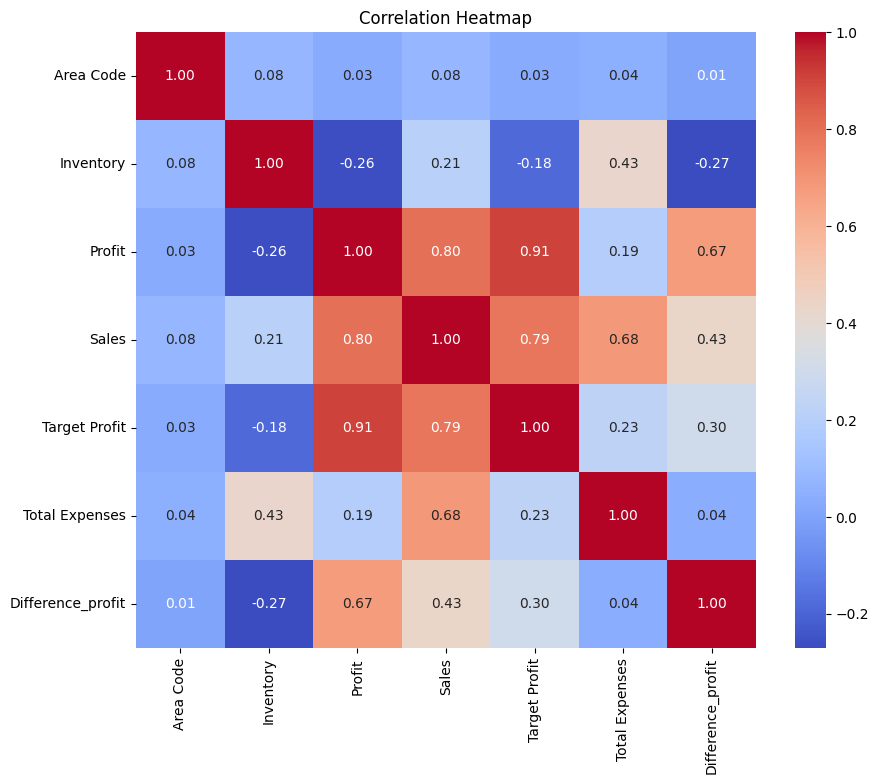

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Coefficients:  [0.04033387]
Intercept:  170.3889648645764
Mean Squared Error:  18731.06254376198
R^2 Score:  0.0034422058133243283


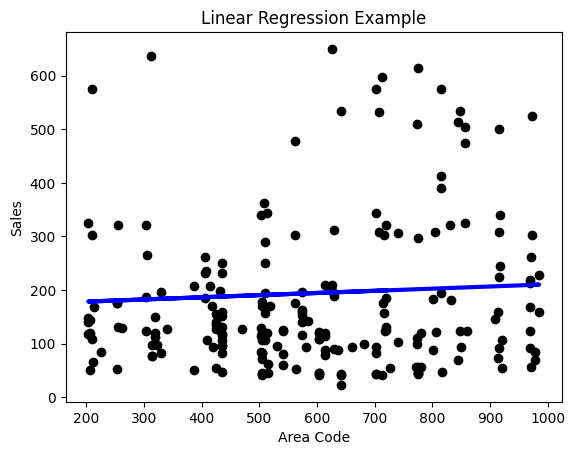

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Area Code']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients and evaluation metrics
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Area Code')
plt.ylabel('Sales')
plt.title('Linear Regression Example')
plt.show()

Mean Squared Error: 23914.098591549297


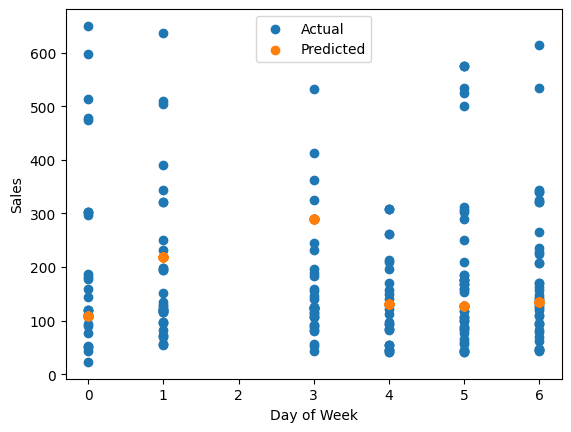

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a datetime feature 'timestamp'
# and a target variable 'target_variable'
df['day_of_week'] = df['Date'].dt.dayofweek

X = df[['day_of_week']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot predictions vs. actual values
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.legend()
plt.show()
